In [343]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [344]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing

from utils import modeling 
from utils import analysis_pipeline

In [345]:
# sample1 = modeling.sample(0,1,2)
# sample2 = modeling.sample(1,1,2)
# print(sample1,sample2)

In [346]:
# decision1 = modeling.decision(sample1,0.5)
# decision2 = modeling.decision(sample2,0.5)
# print(decision1,decision2)

In [347]:
# print(modeling.accuracy([0,0],decision1))
# print(modeling.accuracy([1,1],decision2))

In [348]:
# ground_truth = [2,1]
# print(modeling.accuracy(ground_truth,modeling.decision(modeling.sample(0,1,2),0.4)))
# print(modeling.accuracy(ground_truth,modeling.decision(modeling.sample(0.5,1,2),0.4)))

In [349]:
set_sizes = np.random.randint(3,6,1000)
df = pd.DataFrame(set_sizes, columns=['set_size'])
df


,set_size
0,4
1,4
2,3
3,3
4,4
...,...
995,3
996,3
997,4
998,3


In [350]:
stimulus = []
for (row_index,row_data) in df.iterrows():
    stimulus.append(modeling.generate_stim(row_data['set_size']))

df['stim'] = stimulus

In [351]:
mean = []
for (row_index,row_data) in df.iterrows():
    mean.append(modeling.generate_mean(row_data['set_size']))

df['mean'] = mean

In [352]:
cue = []
for (row_index,row_data) in df.iterrows():
    cue.append(modeling.cue(row_data['stim']))

df['cue'] = cue

In [353]:
df

,set_size,stim,mean,cue
0,4,"[0.6238891378122793, 0.4692367800061884, 0.534...",1.750000,0
1,4,"[0.1261347681820404, 0.3197100407785526, 0.857...",1.750000,0
2,3,"[0.5399800141891818, 0.9753045597132173, 0.120...",2.333333,2
3,3,"[0.037053637311633136, 0.6320315976240919, 0.8...",2.333333,1
4,4,"[0.9635450549547365, 0.7353374046258637, 0.159...",1.750000,3
...,...,...,...,...
995,3,"[0.19987023637961454, 0.661283772344733, 0.528...",2.333333,1
996,3,"[0.0411280884325147, 0.4542858958860725, 0.112...",2.333333,1
997,4,"[0.4995250792714816, 0.28394813505084326, 0.49...",1.750000,1
998,3,"[0.14106160516602395, 0.9059782261752082, 0.32...",2.333333,2


In [354]:
sample = []
for (row_index,row_data) in df.iterrows():
    sample.append(modeling.sample(0.5,0.4))

df['sample'] = sample

In [355]:
decision = []
guessing = []
for (row_index,row_data) in df.iterrows():
    if row_data['sample'] < 0.5:
        guessing.append(1)
    else:
        guessing.append(0)
    decision.append(modeling.decision_random(row_data['stim'],row_data['sample'],row_data['cue'],5))

df['decision'] = decision
df['guessing'] = guessing

In [356]:
df

,set_size,stim,mean,cue,sample,decision,guessing
0,4,"[0.6238891378122793, 0.4692367800061884, 0.534...",1.750000,0,0.254721,0.085979,1
1,4,"[0.1261347681820404, 0.3197100407785526, 0.857...",1.750000,0,0.476633,0.132959,1
2,3,"[0.5399800141891818, 0.9753045597132173, 0.120...",2.333333,2,0.479823,0.482144,1
3,3,"[0.037053637311633136, 0.6320315976240919, 0.8...",2.333333,1,0.621134,0.386347,0
4,4,"[0.9635450549547365, 0.7353374046258637, 0.159...",1.750000,3,0.854724,0.542093,0
...,...,...,...,...,...,...,...
995,3,"[0.19987023637961454, 0.661283772344733, 0.528...",2.333333,1,0.863016,0.356467,0
996,3,"[0.0411280884325147, 0.4542858958860725, 0.112...",2.333333,1,1.145019,0.916812,0
997,4,"[0.4995250792714816, 0.28394813505084326, 0.49...",1.750000,1,0.401930,0.938256,1
998,3,"[0.14106160516602395, 0.9059782261752082, 0.32...",2.333333,2,-0.146503,0.827328,1


<Axes: ylabel='Frequency'>

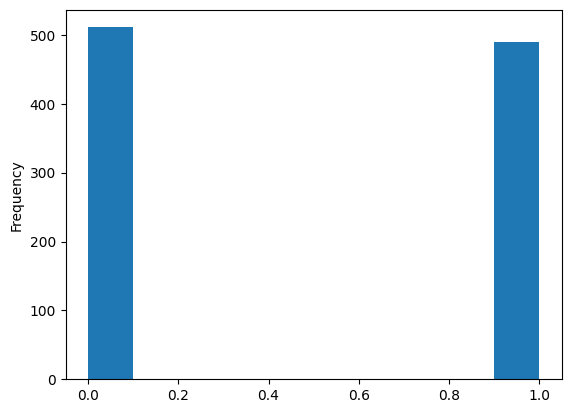

In [357]:
df['guessing'].plot(kind="hist")

In [358]:
df

,set_size,stim,mean,cue,sample,decision,guessing
0,4,"[0.6238891378122793, 0.4692367800061884, 0.534...",1.750000,0,0.254721,0.085979,1
1,4,"[0.1261347681820404, 0.3197100407785526, 0.857...",1.750000,0,0.476633,0.132959,1
2,3,"[0.5399800141891818, 0.9753045597132173, 0.120...",2.333333,2,0.479823,0.482144,1
3,3,"[0.037053637311633136, 0.6320315976240919, 0.8...",2.333333,1,0.621134,0.386347,0
4,4,"[0.9635450549547365, 0.7353374046258637, 0.159...",1.750000,3,0.854724,0.542093,0
...,...,...,...,...,...,...,...
995,3,"[0.19987023637961454, 0.661283772344733, 0.528...",2.333333,1,0.863016,0.356467,0
996,3,"[0.0411280884325147, 0.4542858958860725, 0.112...",2.333333,1,1.145019,0.916812,0
997,4,"[0.4995250792714816, 0.28394813505084326, 0.49...",1.750000,1,0.401930,0.938256,1
998,3,"[0.14106160516602395, 0.9059782261752082, 0.32...",2.333333,2,-0.146503,0.827328,1


In [359]:
# ground_truth = []
# for (row_index,row_data) in df.iterrows():
#     ground_truth.append(1)

# df['ground_truth'] = ground_truth

In [360]:
df

,set_size,stim,mean,cue,sample,decision,guessing
0,4,"[0.6238891378122793, 0.4692367800061884, 0.534...",1.750000,0,0.254721,0.085979,1
1,4,"[0.1261347681820404, 0.3197100407785526, 0.857...",1.750000,0,0.476633,0.132959,1
2,3,"[0.5399800141891818, 0.9753045597132173, 0.120...",2.333333,2,0.479823,0.482144,1
3,3,"[0.037053637311633136, 0.6320315976240919, 0.8...",2.333333,1,0.621134,0.386347,0
4,4,"[0.9635450549547365, 0.7353374046258637, 0.159...",1.750000,3,0.854724,0.542093,0
...,...,...,...,...,...,...,...
995,3,"[0.19987023637961454, 0.661283772344733, 0.528...",2.333333,1,0.863016,0.356467,0
996,3,"[0.0411280884325147, 0.4542858958860725, 0.112...",2.333333,1,1.145019,0.916812,0
997,4,"[0.4995250792714816, 0.28394813505084326, 0.49...",1.750000,1,0.401930,0.938256,1
998,3,"[0.14106160516602395, 0.9059782261752082, 0.32...",2.333333,2,-0.146503,0.827328,1


In [361]:
df['decision_rad'] = analysis_pipeline.rad_convert(df['decision'])

In [362]:
normalized_decision = []

for (row_index,row_data) in df.iterrows():
    normalized_decision.append(modeling.normalize_decision(abs(row_data['decision_rad'])))

df['normalized_decision'] = normalized_decision

In [363]:
print(df.to_string())

     set_size                                                                                                         stim      mean  cue    sample  decision  guessing  decision_rad  normalized_decision
0           4                            [0.6238891378122793, 0.4692367800061884, 0.5344076884164393, 0.41444808734324556]  1.750000    0  0.254721  0.085979         1      0.540222             0.540222
1           4                            [0.1261347681820404, 0.3197100407785526, 0.8578615265112334, 0.07060750677210981]  1.750000    0  0.476633  0.132959         1      0.835405             0.835405
2           3                                                [0.5399800141891818, 0.9753045597132173, 0.12024128998502837]  2.333333    2  0.479823  0.482144         1      3.029401             3.029401
3           3                                               [0.037053637311633136, 0.6320315976240919, 0.8522534930825775]  2.333333    1  0.621134  0.386347         0      2.427492       

In [364]:
stim_rad = []

for (row_index,row_data) in df.iterrows():
    buffer = []
    for value in row_data['stim']:
        buffer.append(analysis_pipeline.rad_convert(value))
    stim_rad.append(buffer)

df['stim_rad'] =  stim_rad

In [365]:
df

,set_size,stim,mean,cue,sample,decision,guessing,decision_rad,normalized_decision,stim_rad
0,4,"[0.6238891378122793, 0.4692367800061884, 0.534...",1.750000,0,0.254721,0.085979,1,0.540222,0.540222,"[3.920011064011053, 2.948301641723143, 3.35778..."
1,4,"[0.1261347681820404, 0.3197100407785526, 0.857...",1.750000,0,0.476633,0.132959,1,0.835405,0.835405,"[0.7925281221658994, 2.0087974307775878, 5.390..."
2,3,"[0.5399800141891818, 0.9753045597132173, 0.120...",2.333333,2,0.479823,0.482144,1,3.029401,3.029401,"[3.392794491324092, 6.1280192796153425, 0.7554..."
3,3,"[0.037053637311633136, 0.6320315976240919, 0.8...",2.333333,1,0.621134,0.386347,0,2.427492,2.427492,"[0.23281486953401462, 3.9711716478649346, 5.35..."
4,4,"[0.9635450549547365, 0.7353374046258637, 0.159...",1.750000,3,0.854724,0.542093,0,3.406069,3.406069,"[6.0541321320971475, 4.620261176564798, 1.0038..."
...,...,...,...,...,...,...,...,...,...,...
995,3,"[0.19987023637961454, 0.661283772344733, 0.528...",2.333333,1,0.863016,0.356467,0,2.239750,2.239750,"[1.2558217325629049, 4.154968482272717, 3.3176..."
996,3,"[0.0411280884325147, 0.4542858958860725, 0.112...",2.333333,1,1.145019,0.916812,0,5.760502,5.760502,"[0.25841540095155907, 2.854362466290286, 0.703..."
997,4,"[0.4995250792714816, 0.28394813505084326, 0.49...",1.750000,1,0.401930,0.938256,1,5.895239,5.895239,"[3.1386086386462915, 1.7840987501525032, 3.119..."
998,3,"[0.14106160516602395, 0.9059782261752082, 0.32...",2.333333,2,-0.146503,0.827328,1,5.198254,5.198254,"[0.8863162049863297, 5.692429079328692, 2.0245..."


In [366]:
choice = []
for (row_index,row_data) in df.iterrows():
    choice.append(modeling.find_stim_choice(row_data['stim_rad'],row_data['decision_rad']))
    
df['choice'] = choice

In [367]:
df

,set_size,stim,mean,cue,sample,decision,guessing,decision_rad,normalized_decision,stim_rad,choice
0,4,"[0.6238891378122793, 0.4692367800061884, 0.534...",1.750000,0,0.254721,0.085979,1,0.540222,0.540222,"[3.920011064011053, 2.948301641723143, 3.35778...",3.0
1,4,"[0.1261347681820404, 0.3197100407785526, 0.857...",1.750000,0,0.476633,0.132959,1,0.835405,0.835405,"[0.7925281221658994, 2.0087974307775878, 5.390...",NaN
2,3,"[0.5399800141891818, 0.9753045597132173, 0.120...",2.333333,2,0.479823,0.482144,1,3.029401,3.029401,"[3.392794491324092, 6.1280192796153425, 0.7554...",2.0
3,3,"[0.037053637311633136, 0.6320315976240919, 0.8...",2.333333,1,0.621134,0.386347,0,2.427492,2.427492,"[0.23281486953401462, 3.9711716478649346, 5.35...",3.0
4,4,"[0.9635450549547365, 0.7353374046258637, 0.159...",1.750000,3,0.854724,0.542093,0,3.406069,3.406069,"[6.0541321320971475, 4.620261176564798, 1.0038...",1.0
...,...,...,...,...,...,...,...,...,...,...,...
995,3,"[0.19987023637961454, 0.661283772344733, 0.528...",2.333333,1,0.863016,0.356467,0,2.239750,2.239750,"[1.2558217325629049, 4.154968482272717, 3.3176...",NaN
996,3,"[0.0411280884325147, 0.4542858958860725, 0.112...",2.333333,1,1.145019,0.916812,0,5.760502,5.760502,"[0.25841540095155907, 2.854362466290286, 0.703...",NaN
997,4,"[0.4995250792714816, 0.28394813505084326, 0.49...",1.750000,1,0.401930,0.938256,1,5.895239,5.895239,"[3.1386086386462915, 1.7840987501525032, 3.119...",2.0
998,3,"[0.14106160516602395, 0.9059782261752082, 0.32...",2.333333,2,-0.146503,0.827328,1,5.198254,5.198254,"[0.8863162049863297, 5.692429079328692, 2.0245...",3.0


In [368]:
accuracy = []
for (row_index,row_data) in df.iterrows():
    accuracy.append(modeling.accuracy(row_data['cue'],row_data['choice']))
    
df['correct'] = accuracy

In [369]:
df

,set_size,stim,mean,cue,sample,decision,guessing,decision_rad,normalized_decision,stim_rad,choice,correct
0,4,"[0.6238891378122793, 0.4692367800061884, 0.534...",1.750000,0,0.254721,0.085979,1,0.540222,0.540222,"[3.920011064011053, 2.948301641723143, 3.35778...",3.0,0
1,4,"[0.1261347681820404, 0.3197100407785526, 0.857...",1.750000,0,0.476633,0.132959,1,0.835405,0.835405,"[0.7925281221658994, 2.0087974307775878, 5.390...",NaN,0
2,3,"[0.5399800141891818, 0.9753045597132173, 0.120...",2.333333,2,0.479823,0.482144,1,3.029401,3.029401,"[3.392794491324092, 6.1280192796153425, 0.7554...",2.0,1
3,3,"[0.037053637311633136, 0.6320315976240919, 0.8...",2.333333,1,0.621134,0.386347,0,2.427492,2.427492,"[0.23281486953401462, 3.9711716478649346, 5.35...",3.0,0
4,4,"[0.9635450549547365, 0.7353374046258637, 0.159...",1.750000,3,0.854724,0.542093,0,3.406069,3.406069,"[6.0541321320971475, 4.620261176564798, 1.0038...",1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,"[0.19987023637961454, 0.661283772344733, 0.528...",2.333333,1,0.863016,0.356467,0,2.239750,2.239750,"[1.2558217325629049, 4.154968482272717, 3.3176...",NaN,0
996,3,"[0.0411280884325147, 0.4542858958860725, 0.112...",2.333333,1,1.145019,0.916812,0,5.760502,5.760502,"[0.25841540095155907, 2.854362466290286, 0.703...",NaN,0
997,4,"[0.4995250792714816, 0.28394813505084326, 0.49...",1.750000,1,0.401930,0.938256,1,5.895239,5.895239,"[3.1386086386462915, 1.7840987501525032, 3.119...",2.0,0
998,3,"[0.14106160516602395, 0.9059782261752082, 0.32...",2.333333,2,-0.146503,0.827328,1,5.198254,5.198254,"[0.8863162049863297, 5.692429079328692, 2.0245...",3.0,0


<Axes: title={'center': 'Set Size Effect on Accuracy'}, xlabel='Set Size', ylabel='Accuracy'>

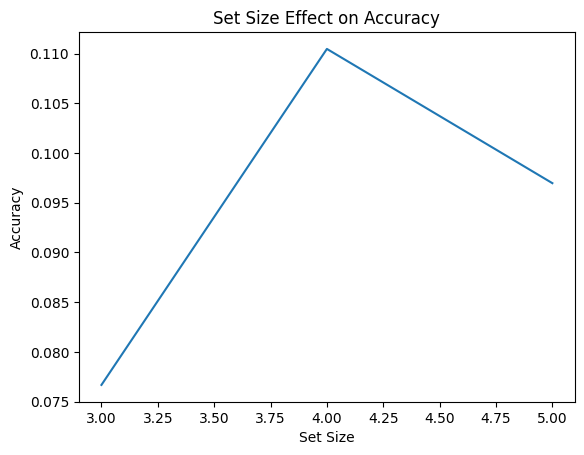

In [370]:
df.groupby('set_size').correct.mean().plot(xlabel= 'Set Size', ylabel= 'Accuracy', title='Set Size Effect on Accuracy')

In [371]:
ang_dist = []
for (row_index,row_data) in df.iterrows():
    ang_dist.append(analysis_pipeline.find_angular_dist(row_data['stim_rad'][row_data['cue']],row_data['decision_rad']))
    
df['precision_difference_0'] = ang_dist

In [372]:
df

,set_size,stim,mean,cue,sample,decision,guessing,decision_rad,normalized_decision,stim_rad,choice,correct,precision_difference_0
0,4,"[0.6238891378122793, 0.4692367800061884, 0.534...",1.750000,0,0.254721,0.085979,1,0.540222,0.540222,"[3.920011064011053, 2.948301641723143, 3.35778...",3.0,0,2.903396
1,4,"[0.1261347681820404, 0.3197100407785526, 0.857...",1.750000,0,0.476633,0.132959,1,0.835405,0.835405,"[0.7925281221658994, 2.0087974307775878, 5.390...",NaN,0,0.042877
2,3,"[0.5399800141891818, 0.9753045597132173, 0.120...",2.333333,2,0.479823,0.482144,1,3.029401,3.029401,"[3.392794491324092, 6.1280192796153425, 0.7554...",2.0,1,2.273903
3,3,"[0.037053637311633136, 0.6320315976240919, 0.8...",2.333333,1,0.621134,0.386347,0,2.427492,2.427492,"[0.23281486953401462, 3.9711716478649346, 5.35...",3.0,0,-1.543680
4,4,"[0.9635450549547365, 0.7353374046258637, 0.159...",1.750000,3,0.854724,0.542093,0,3.406069,3.406069,"[6.0541321320971475, 4.620261176564798, 1.0038...",1.0,0,2.705343
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,"[0.19987023637961454, 0.661283772344733, 0.528...",2.333333,1,0.863016,0.356467,0,2.239750,2.239750,"[1.2558217325629049, 4.154968482272717, 3.3176...",NaN,0,-1.915219
996,3,"[0.0411280884325147, 0.4542858958860725, 0.112...",2.333333,1,1.145019,0.916812,0,5.760502,5.760502,"[0.25841540095155907, 2.854362466290286, 0.703...",NaN,0,2.906140
997,4,"[0.4995250792714816, 0.28394813505084326, 0.49...",1.750000,1,0.401930,0.938256,1,5.895239,5.895239,"[3.1386086386462915, 1.7840987501525032, 3.119...",2.0,0,-2.172045
998,3,"[0.14106160516602395, 0.9059782261752082, 0.32...",2.333333,2,-0.146503,0.827328,1,5.198254,5.198254,"[0.8863162049863297, 5.692429079328692, 2.0245...",3.0,0,-3.109442


<Axes: title={'center': 'Set Size Effect on Precision'}, xlabel='Set Size', ylabel='Angular Distance from Target (rad)'>

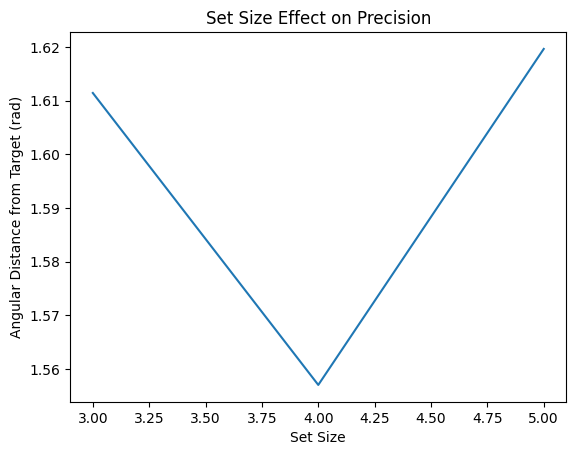

In [373]:
df['precision_difference_0_abs'] = df['precision_difference_0'].abs()

df.groupby('set_size').precision_difference_0_abs.mean().plot(xlabel= 'Set Size', ylabel= 'Angular Distance from Target (rad)', title='Set Size Effect on Precision')

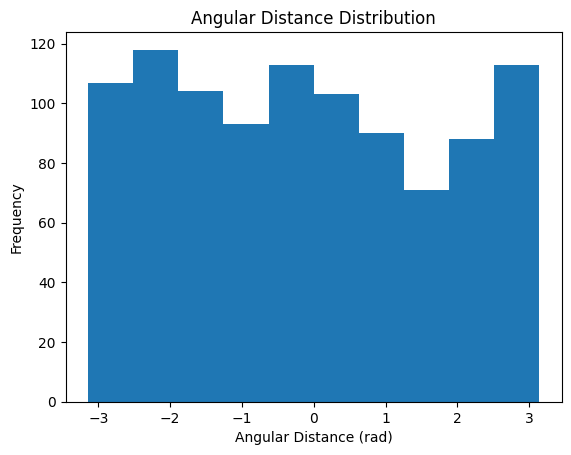

In [378]:
analysis_pipeline.plot_hist('precision_difference_0',df,'Angular Distance (rad)','Angular Distance Distribution')

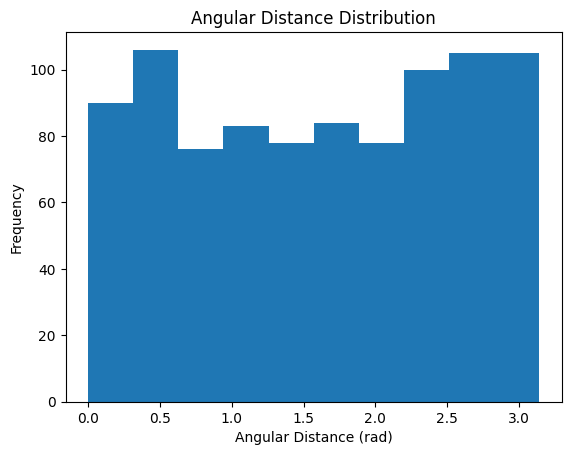

In [379]:
incorrect_df = df[df['correct'] == 0]
analysis_pipeline.plot_hist('precision_difference_0_abs',incorrect_df,'Angular Distance (rad)','Angular Distance Distribution')

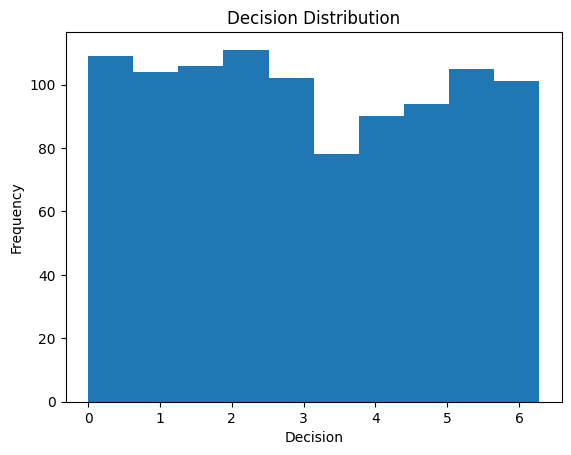

In [380]:
analysis_pipeline.plot_hist('normalized_decision',df,'Decision','Decision Distribution')